In [ ]:
#import Related Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model

In [ ]:
# Loading the MNIST dataset and extracting training and testing data
(x_train, _), (x_test, _) = mnist. load_data()

# Normalizing pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Displaying the shapes of the training and testing datasets
print("Shape of the training data:", x_train.shape)
print("Shape of the testing data:", x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
Shape of the training data: (60000, 28, 28)
Shape of the testing data: (10000, 28, 28)


In [ ]:
# Definition of the Autoencoder model as a subclass of the TensorFlow

class SimpleAutoencoder(Model):
  def __init__(self, latent_dimensions , data_shape):
    super(SimpleAutoencoder, self).__init__()
    self.latent_dimensions = latent_dimensions
    self.data_shape = data_shape

# Encoder architecture using a Sequential model
    self.encoder = tf.keras.Sequential([
      layers. Flatten(),
      layers.Dense(latent_dimensions, activation='relu'),
])
    # Decoder architecture using another Sequential model
    self.decoder = tf.keras. Sequential([
      layers.Dense(tf.math.reduce_prod(data_shape), activation='sigmoid'),
      layers. Reshape(data_shape)
    ])
# Forward pass method defining the encoding and decoding steps
  def call(self, input_data):
    encoded_data = self.encoder(input_data)
    decoded_data = self.decoder(encoded_data)
    return decoded_data

# Extracting shape information from the testing dataset
input_data_shape = x_test.shape[1: ]

# Specifying the dimensionality of the latent space
latent_dimensions = 64

# Creating an instance of the SimpleAutoencoder model
simple_autoencoder = SimpleAutoencoder(latent_dimensions, input_data_shape)

In [ ]:
simple_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

simple_autoencoder.fit(x_train, x_train,
                       epochs=1,
                       shuffle=True,
                       validation_data=(x_test, x_test))

1875/1875 [==============================] - 9s 4ms/step - loss: 0.0238 - val_loss: 0.0091


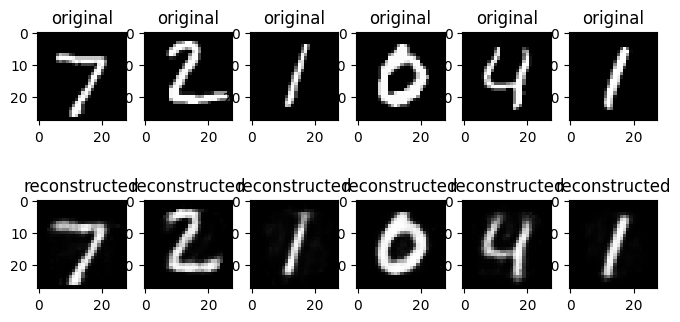

In [ ]:
encoded_imgs = simple_autoencoder.encoder(x_test).numpy()
decoded_imgs = simple_autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(8, 4))
for i in range(n):
# display original
  ax = plt.subplot(2, n, i + 1)
  plt. imshow(x_test[i])
  plt.title("original")
  plt.gray()

# display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt. imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()

plt.show()